In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline

In [6]:
# Forming the iris dataframe
Data = pd.read_csv("iris.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


In [7]:
#Top values of dataset
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Bottom values of dataset
Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
Data.shape

(150, 6)

In [10]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
Data.drop('Id', axis = 1 , inplace= True)
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = Data.drop('Species', axis = 1)
Y = Data['Species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

In [16]:
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

In [17]:
#Saving Model
pickle.dump(dtc, open('model.pkl','wb'))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

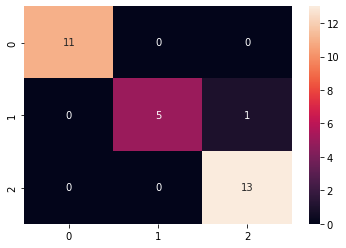

In [18]:
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)

In [19]:
accuracy_score(y_test, y_predict)

0.9666666666666667

In [21]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.9488580359780636

In [22]:
dtc1 = DecisionTreeClassifier(criterion = "gini",random_state =0)
model = dtc1.fit(X_train,y_train)
y_predict1 = dtc1.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

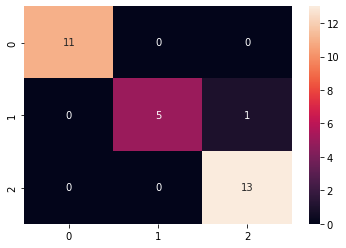

In [23]:
print(classification_report(y_test, y_predict1))
sns.heatmap(confusion_matrix(y_test, y_predict1),annot = True)

In [24]:
accuracy_score(y_test, y_predict1)

0.9666666666666667

In [25]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict1)

0.9488580359780636

[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(100.44000000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(33.480000000000004, 90.6, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(100.44000000000001, 90.6, 'X[0] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0

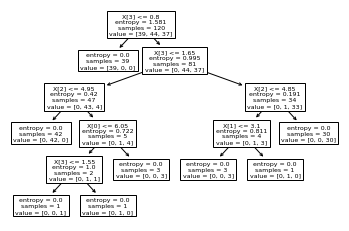

In [26]:
from sklearn import tree
tree.plot_tree(dtc)

[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(100.44000000000001, 90.6, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.840000000000

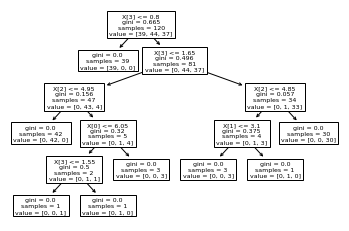

In [27]:
from sklearn import tree
tree.plot_tree(dtc1)